## Final Project Submission


* Student name: Joseph Szpigiel
* Student pace: Part Time
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:https://yshp57.github.io/project_1_-_feature_selection


## Import any neccesary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

For this project, we will be using the OSEMN framework. OSEMN is simply a work flow for Data Scientists that lays out the steps which are neccesary when modeling any dataset. It helps organize our work and focus us on our task without getting lost in the weeds. Before anything, however, we have to identify our question so that we know what we are looking for. After that, we can begin to use the OSEMN framework to help guide us toward our goal.

Firstly, we must Obtain our data. Without it, we have nothing to work with. Next we Scrub the data, cleaning up anything missing or innacurate to make it easier to process later. After that we Explore our data, asking questions and looking for valuable relationships that might be interesting. These can be helpful when modeling our data, but can also be valuable questions in their own right. Once we have explored, it is time to Model our data, using some form of machine learning technique. This allows us to predict outcomes based on unknowns, connecting the relationships in our data to our target. Modeling is an iterative process, meaning that as we model, we will likely discover errors and issues with our model, that we can then change in a second or third attempt. Each time, we are looking for a better model which can explain more of our data. And lastly, we come to iNterpret our model. Here is where we draw the conclusions and try to explain our results to those who are asking the question in the first place. We will use thise framework throughout this project to reach our goal of predicting the price of homes based on information given to us in our housing data set.

## Goal- predict the price of homes based on the given features

## O- Obtain our Data 

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
initialsize = df.shape[0]
initialsize

21597

## S - Scrub our Data

Now that we have our data loaded into a DataFrame, we can begin to clean out Data.
Things to look for: 
  - Understand what each feature means
  - Make sure the datatype matches the information given
  - Drop columns that don't contain meaningful data
  - Find missing values and choose how to deal with them:
      - Fill with mean or other value
      - Delete rows
      - Delete columns that are too sparse
  - Indentify placeholder values and deal with them in same ways as missing values
  - Normalize Data
  - One Hot encode any categorical variables

In [4]:
#A quick look at the columns tells us that the id field is a randomly assigned number and not useful for our analysis.
df = df.drop(columns='id')

In [5]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.3+ MB


In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#yr_built will be more useful as an age category
df['age']= (2015 - df.yr_built)

In [9]:
df = df.drop(columns='yr_built')

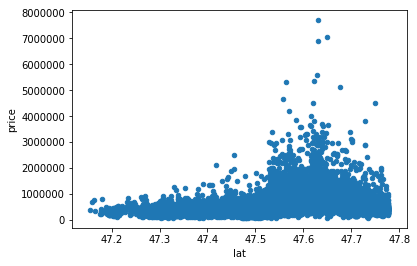

In [10]:
df.plot(x='lat', y='price', kind= 'scatter')

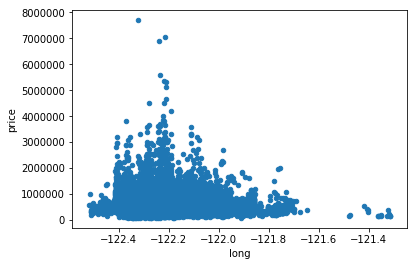

In [11]:
df.plot(x='long', y='price', kind= 'scatter')

While there does seem to be a relationship between where a house is and how much it costs, the zipcode will serve as a more useful measure of this and we can therefore drop the lat and long columns

In [12]:
df= df.drop(columns=['lat', 'long'])

In [13]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [14]:
#33 rooms is either a placeholder, an error, or a severe outlier
df = df[df.bedrooms < 30]

Looking at the datatypes, date will be most useful as a date type, waterfront should be classified as a boolean (is or is not by the waterfront), zipcode should be categorical, and basement squarefootage should be an integer. To change waterfronts data type, we must first address missing values, as setting waterfront to boolean will set any null values to False

In [15]:
#To view information regarding the date, we first need to set it as a date type.
df.date = df.date.astype('datetime64')

In [16]:
print(df.date.min(), df.date.max())

2014-05-02 00:00:00 2015-05-27 00:00:00


In [17]:
#Since the difference between the earliest year and the latest year of sale is only 1 year, it would not be worth
#considering the value of the dollar in relation to price change. Therefore we will drop the column.
df = df.drop(columns='date')

In [18]:
df.zipcode = df.zipcode.astype('category')

In [19]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [20]:
# '?' is definitely not a number. As such, we need to see how many values have '?' as their entry.
print('Number of entries: ' + str(df[df.sqft_basement == '?'].shape[0]))
print('Percent of entries: ' + str(100*df[df.sqft_basement == '?'].shape[0]/df.shape[0]))

Number of entries: 454
Percent of entries: 2.102241155769587


In [21]:
#Seeing as it only makes up 2.1 percent of our data, we can drop the offending entries

In [22]:
df = df[df.sqft_basement != '?']

In [23]:
df.sqft_basement = df.sqft_basement.astype('float')

In [24]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_renovated     3754
zipcode             0
sqft_living15       0
sqft_lot15          0
age                 0
dtype: int64

#### We see missing values in waterfront, view, and yr_renovated. Each will have to be dealt with individually.

## View null values

#### According to the column dscription, View is an index from 0 - 4 telling us how good the view of the property was, likely indicating that it is up for sale. Presumably, the number value in the column tells us how many times it has been viewed.

In [25]:
print(df.view.isnull().sum())
df.view.value_counts()

61


0.0    19017
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64

In [26]:
63/df.shape[0]

0.002979850534481128

In [27]:
#null views make up only 0.29% of data, a negligable amount. Therefore we will drop these entries.

In [28]:
df = df[df.view.notna()]

## Waterfront null values

In [29]:
print(df.waterfront.isnull().sum())
df.waterfront.value_counts()

2333


0.0    18607
1.0      141
Name: waterfront, dtype: int64

In [30]:
df.waterfront.isnull().sum()/df.shape[0]

0.11066837436554243

In [31]:
df.waterfront.value_counts(dropna=False, normalize=True)

 0.0    0.882643
NaN     0.110668
 1.0    0.006688
Name: waterfront, dtype: float64

11% is too high to drop all null values. We'll need to think of another way to fill the data. Considering how few houses there are on the water, it will be far safer to assume that the null values are not on the water, as even a handful of mistaken positives will overwhelm our certain data whereas false negatives will be absorbed into the relatively large amount of homes not on the water without changing the distribution significantly. Altogether it will only account for 11.1% of the homes we list as not on the water.

In [32]:
df.waterfront.fillna(0, inplace=True)

In [33]:
#We can now set the waterfront datatype to a boolean
df.waterfront = df.waterfront.astype('bool')

### Year Renovated null values

In [34]:
print(df.yr_renovated.isnull().sum())

3742


In [35]:
3830/df.shape[0]

0.18168018594943314

In [36]:
df[df.yr_renovated>0].yr_renovated.value_counts().sum()/df.shape[0]

0.03424884967506285

In [37]:
df[df.yr_renovated>0].yr_renovated.describe()

count     722.000000
mean     1996.055402
std        15.440898
min      1934.000000
25%      1987.000000
50%      2000.000000
75%      2007.750000
max      2015.000000
Name: yr_renovated, dtype: float64

Since the years being reported are the years of renovation, and the number of houses that have been renovation only make up 3.45% of the data, it is safe to assume that both those without a year listed and those with zeroes listed have never been renovated and they should be treated the same. Years are not a continuous numerical variable and therefore the data will be binned before further processing, and both zeroes and empties will be it's own category of having not been renovated.

In [38]:
df.yr_renovated.fillna(value=0, inplace=True)

In [39]:
yr_renovated_bins = []

for year in df.yr_renovated:
    if year == 0:
        yr_renovated_bins.append('NotRenovated')
    elif year >= 1930 and year < 1940:
        yr_renovated_bins.append('Ren_1930s')
    elif year >= 1940 and year < 1950:
        yr_renovated_bins.append('Ren_1940s')
    elif year >= 1950 and year < 1960:
        yr_renovated_bins.append('Ren_1950s')
    elif year >= 1960 and year < 1970:
        yr_renovated_bins.append('Ren_1960s')
    elif year >= 1970 and year < 1980:
        yr_renovated_bins.append('Ren_1970s')
    elif year >= 1980 and year < 1990:
        yr_renovated_bins.append('Ren_1980s')
    elif year >= 1990 and year < 2000:
        yr_renovated_bins.append('Ren_1990s')
    elif year >= 2000 and year < 2010:
        yr_renovated_bins.append('Ren_2000s')
    elif year >= 2010 and year < 2020:
        yr_renovated_bins.append('Ren_2010s')
    

df['yr_renovated_bins'] = yr_renovated_bins

In [40]:
df = df.drop(columns='yr_renovated')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21081 entries, 0 to 21596
Data columns (total 17 columns):
price                21081 non-null float64
bedrooms             21081 non-null int64
bathrooms            21081 non-null float64
sqft_living          21081 non-null int64
sqft_lot             21081 non-null int64
floors               21081 non-null float64
waterfront           21081 non-null bool
view                 21081 non-null float64
condition            21081 non-null int64
grade                21081 non-null int64
sqft_above           21081 non-null int64
sqft_basement        21081 non-null float64
zipcode              21081 non-null category
sqft_living15        21081 non-null int64
sqft_lot15           21081 non-null int64
age                  21081 non-null int64
yr_renovated_bins    21081 non-null object
dtypes: bool(1), category(1), float64(5), int64(9), object(1)
memory usage: 2.6+ MB


In [42]:
df.isna().sum()

price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
zipcode              0
sqft_living15        0
sqft_lot15           0
age                  0
yr_renovated_bins    0
dtype: int64

## Everything is now in an appropriate datatype with no null values. We must now remove outliers that will create issues for our model. 

We will first remove any data points that are outside the range of 3 standard deviations from the mean from some of our numeric variables. These outliers would skew our data and give us a higher kurtosis, two things we do not want for our model. 

In [43]:
num_var =['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 
          'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15', 'age']

for var in num_var:
    std = df[var].std()
    mean = df[var].mean()
    maximum = mean + 3*std
    minimum = mean  - 3*std
    df = df[df[var]<=maximum]
    df = df[df[var]>=minimum]

In [44]:
df.shape[0]/initialsize

0.8918368291892392

After all of the data points we have dorpped, we still have 89.18 percent of our intial data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0b0277f0>,
      dtype=object)

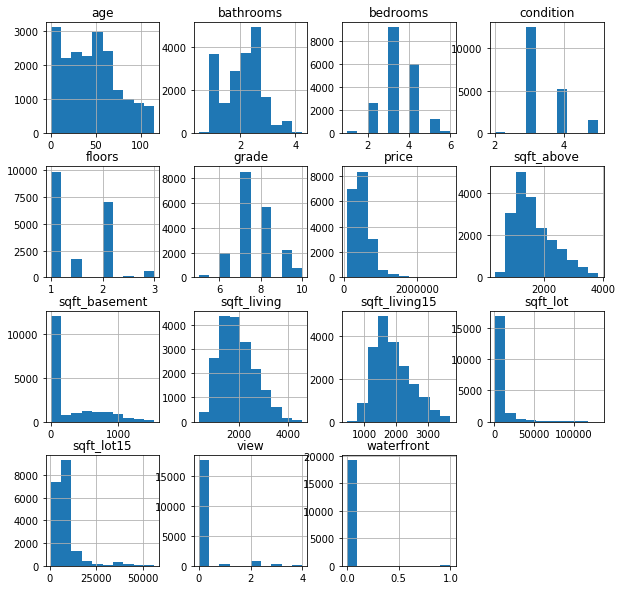

In [45]:
df.hist(figsize=(10,10))

We can see here that many of our variables are not normally distributed and may benefit from normalization. However, when it comes to interpretation of our model, it will be easier to understand when scaled and that may be a worth while tradeoff. We will go forward with this dataset and make note when we model our data that we me may need to come back to this.

## Check for multicolinearity

In [46]:
np.absolute(df.corr())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age
price,1.000000,0.275550,0.425757,0.600662,0.071397,0.251644,0.163562,0.332666,0.063512,0.605261,0.489630,0.257732,0.528387,0.074897,0.011456
bedrooms,0.275550,1.000000,0.486406,0.605068,0.106556,0.159777,0.016869,0.040240,0.025106,0.325259,0.482259,0.278438,0.388029,0.117181,0.156341
bathrooms,0.425757,0.486406,1.000000,0.704882,0.035392,0.511296,0.018180,0.110439,0.132704,0.610706,0.620259,0.224057,0.517095,0.044782,0.527553
sqft_living,0.600662,0.605068,0.704882,1.000000,0.201468,0.349141,0.036281,0.191587,0.056297,0.693487,0.842642,0.381895,0.726667,0.220748,0.315019
sqft_lot,0.071397,0.106556,0.035392,0.201468,1.000000,0.123931,0.061014,0.064672,0.048140,0.108203,0.192810,0.037387,0.250568,0.809587,0.013198
floors,0.251644,0.159777,0.511296,0.349141,0.123931,1.000000,0.011906,0.006425,0.270833,0.463780,0.538934,0.286711,0.260183,0.132619,0.493871
waterfront,0.163562,0.016869,0.018180,0.036281,0.061014,0.011906,1.000000,0.347971,0.014250,0.031392,0.020610,0.030954,0.050742,0.077748,0.032369
view,0.332666,0.040240,0.110439,0.191587,0.064672,0.006425,0.347971,1.000000,0.042621,0.170167,0.085150,0.204105,0.219348,0.060471,0.086733
condition,0.063512,0.025106,0.132704,0.056297,0.048140,0.270833,0.014250,0.042621,1.000000,0.162708,0.165800,0.181649,0.093103,0.061982,0.366385
grade,0.605261,0.325259,0.610706,0.693487,0.108203,0.463780,0.031392,0.170167,0.162708,1.000000,0.690991,0.081826,0.652696,0.139944,0.454381


sqft_living has a coorelation of over .75 with the sqft above ground, while the sqft_lot is highly coorelated with the sqft of the lot of the closest 15 neighbors. Therefore, we will drop the sqft_above column as the sqft_living column is a more useful descriptor of the property and the sqft of the lot of the 15 closest neighbors as it is less meaningful for the given house.

In [47]:
df = df.drop(columns= ['sqft_above', 'sqft_lot15'])

In [48]:
#We must change any categorical variables into dummy variables
df2 = df
df2 = pd.get_dummies(df2, drop_first=True)

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19261 entries, 0 to 21596
Data columns (total 91 columns):
price                          19261 non-null float64
bedrooms                       19261 non-null int64
bathrooms                      19261 non-null float64
sqft_living                    19261 non-null int64
sqft_lot                       19261 non-null int64
floors                         19261 non-null float64
waterfront                     19261 non-null bool
view                           19261 non-null float64
condition                      19261 non-null int64
grade                          19261 non-null int64
sqft_basement                  19261 non-null float64
sqft_living15                  19261 non-null int64
age                            19261 non-null int64
zipcode_98002                  19261 non-null uint8
zipcode_98003                  19261 non-null uint8
zipcode_98004                  19261 non-null uint8
zipcode_98005                  19261 non-null uint

## E- Explore our Data 

In this section, we are going to explore what it is that we have in our datasets, with a goal of looking for new insights that we wouldnt have otherwise known. We will also be looking at some plots to see how good our assumption of linearity before we go int our model.

In [50]:
df2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'sqft_living15', 'age', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106'

In [51]:
import warnings
warnings.filterwarnings("ignore")

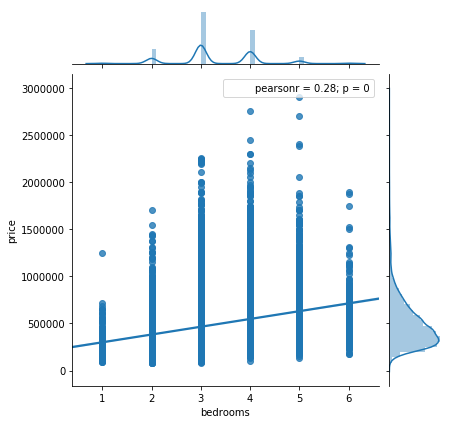

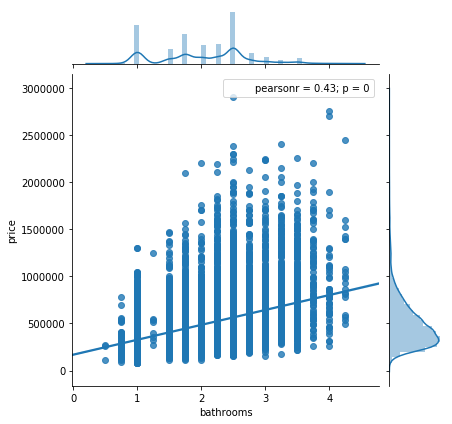

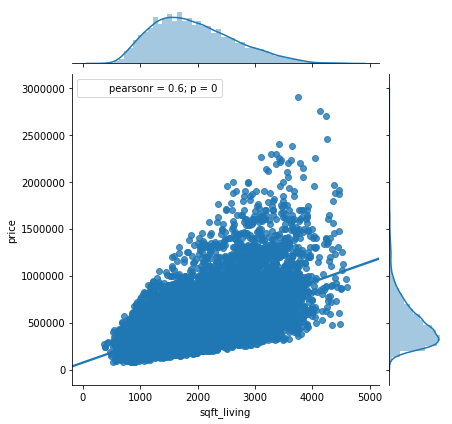

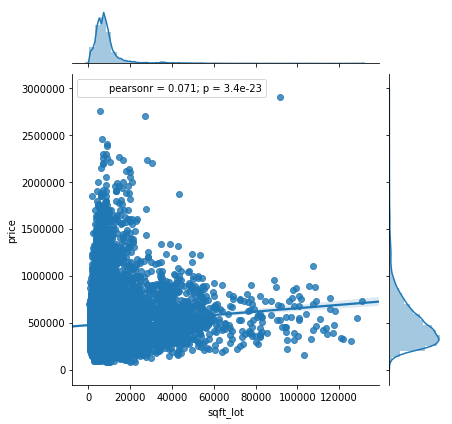

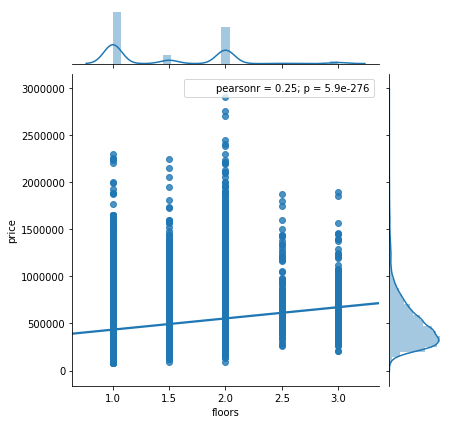

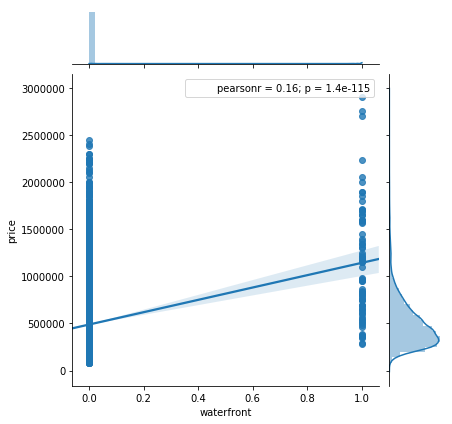

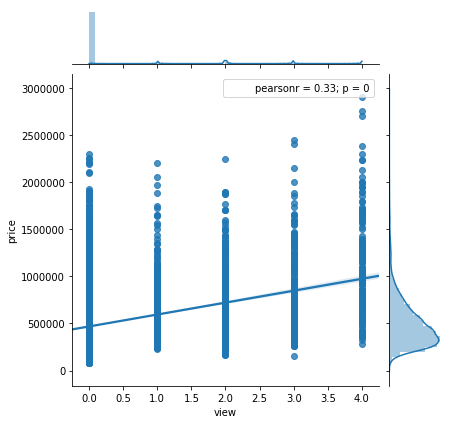

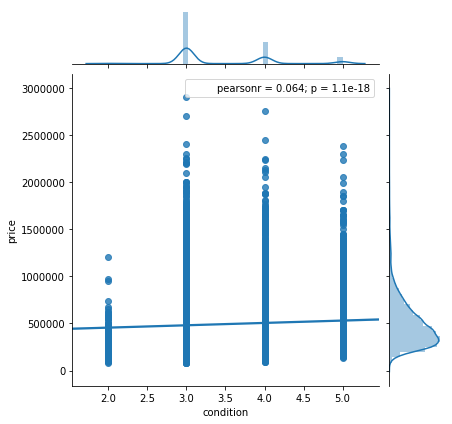

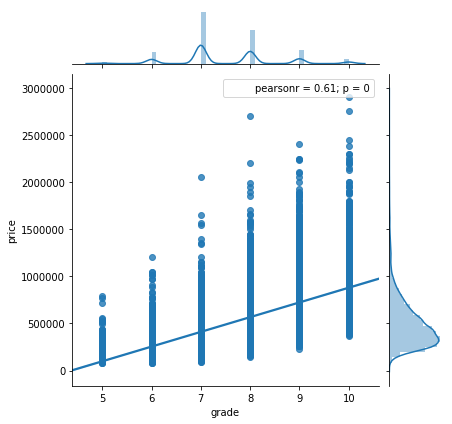

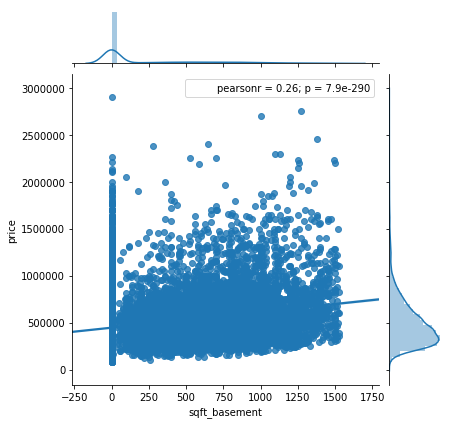

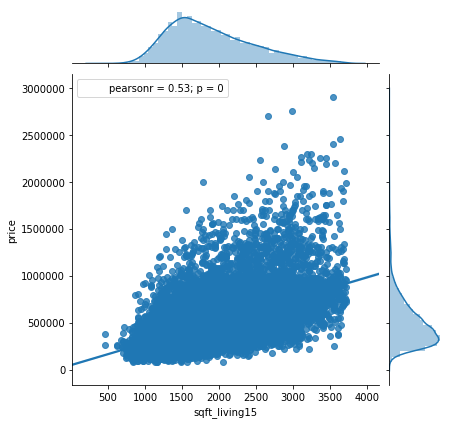

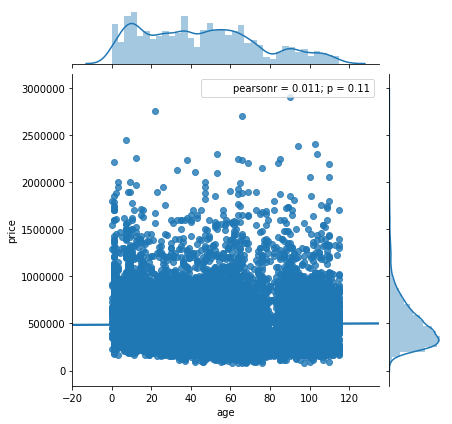

In [52]:
cols= ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_basement', 'sqft_living15', 'age']
for col in cols:
    sns.jointplot(x=col, y='price', data=df2, kind='reg')

Looking at these graphs, it would appear that the sqft of the living space is the best indicator we have on price, followed by grade, and sqft of living space for the 15 closest neighbors. It should be noted that the the footage for neighbors as well as grade were just below the cutoff for being too highly coorelated with living space footage to be included, so if there are issues with our model, this may be one source of error. Additionally, we see that the age of the house has a p value of .11 which is well the .05 cuttoff we have for our 95% confidnece interval.

### Question 1: What zipcode has the most expensive homes?

We will look at two means of assesing the price of the homes- overall price and price per square foot.

In [53]:
df['pricepersqft'] = df.price/df.sqft_living

In [54]:
dfzips = df.groupby('zipcode', as_index=False).mean().sort_values('price', ascending=False,)
dfzips.zipcode = dfzips.zipcode.astype(str)

In [55]:
dfzips.head()

,zipcode,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,sqft_living15,age,pricepersqft
24,98039,1.401087e+06,3.565217,2.184783,2555.217391,14913.869565,1.304348,0.000000,0.173913,3.608696,8.260870,451.304348,2784.347826,57.391304,564.158135
3,98004,1.035419e+06,3.554054,2.144144,2284.864865,11558.103604,1.346847,0.000000,0.171171,3.585586,8.067568,351.621622,2441.801802,49.414414,473.614151
25,98040,9.481714e+05,3.847368,2.385526,2568.926316,11952.284211,1.410526,0.005263,0.363158,3.857895,8.452632,415.452632,2651.789474,47.247368,379.899702
48,98112,9.419694e+05,3.328767,2.195205,2204.429224,4287.762557,1.751142,0.000000,0.086758,3.484018,8.173516,421.506849,2087.447489,70.374429,431.936444
53,98119,8.120209e+05,3.201183,2.142012,1909.307692,3488.189349,1.769231,0.000000,0.479290,3.343195,7.946746,379.644970,1830.236686,68.248521,434.228403


In [56]:
plt.style.use('ggplot')

Text(0.5,1,'Top Average Prices by Zipcode')

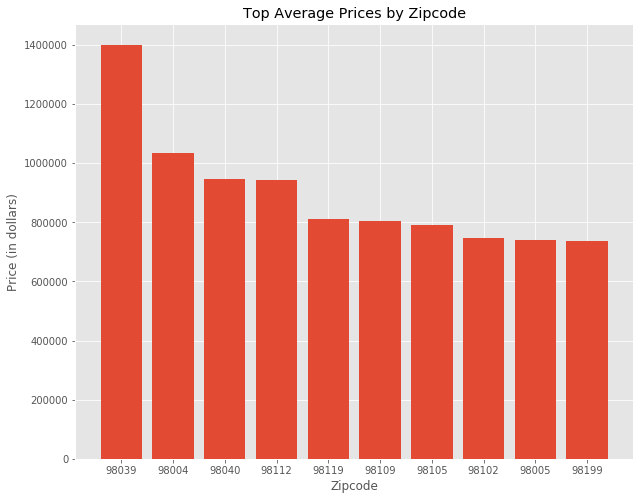

In [57]:
plt.figure(figsize=(10,8))
plt.bar(dfzips['zipcode'].head(10), dfzips.price.head(n=10))
plt.xlabel('Zipcode')
plt.ylabel('Price (in dollars)')
plt.title('Top Average Prices by Zipcode')

Text(0.5,1,'Most Expensive Zipcodes by Dollar per Square Foot of Living Space')

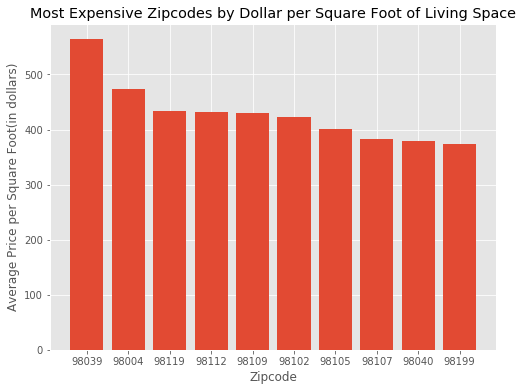

In [134]:
zippricesqft = dfzips.sort_values('pricepersqft', ascending=False).head(10)
plt.figure(figsize=(8,6))
plt.bar(zippricesqft['zipcode'].head(10), zippricesqft.pricepersqft.head(n=10))
plt.xlabel('Zipcode')
plt.ylabel('Average Price per Square Foot(in dollars)')
plt.title('Most Expensive Zipcodes by Dollar per Square Foot of Living Space')

In [141]:
zipmin = dfzips.pricepersqft.min()
zipmax = dfzips.pricepersqft.max()
zipdifference = zipmax - zipmin
zipdifference

416.213276798591

In [139]:
dfzips.pricepersqft.max()

564.1581353829395

Text(0.5,1,'Least Expensive Zipcodes by Dollar per Square Foot of Living Space')

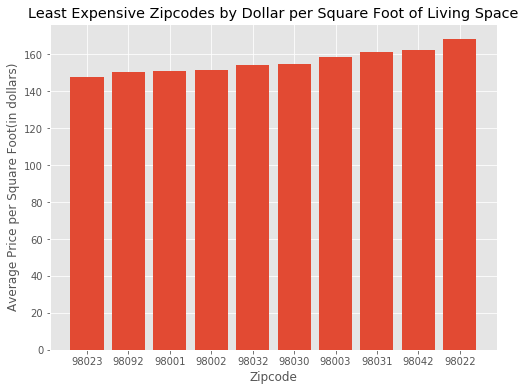

In [131]:
zippricesqft = dfzips.sort_values('pricepersqft', ascending=True).head(10)
plt.figure(figsize=(8,6))
plt.bar(zippricesqft['zipcode'].head(10), zippricesqft.pricepersqft.head(n=10))
plt.xlabel('Zipcode')
plt.ylabel('Average Price per Square Foot(in dollars)')
plt.title('Least Expensive Zipcodes by Dollar per Square Foot of Living Space')

According to our graphs, the average home in the 98039 zipcode is both more expensive a as a whole and by square inch than any other zipcodes. However, 98040, which is the 3rd most expensive zipcode when looking at property, is 8th when considering how much land you are getting. It may be something to think about if you want to get more land while staying in the expensive zipcodes.

### Question 2: How does a renovation affect the price of older houses?

In [60]:
dfren = df[df.yr_renovated_bins!= 'NotRenovated']
dfren = dfren[dfren.age >= 60]
dfnotren = df[df.yr_renovated_bins == 'NotRenovated']
dfnotren = dfnotren[dfnotren.age >=60]

In [124]:
dfren['pricepersqftlot'] = dfren.price/dfren.sqft_lot
dfnotren['pricepersqftlot'] = dfnotren.price/dfnotren.sqft_lot

In [61]:
print(dfren.shape[0])
print(dfnotren.shape[0])

494
5483


319.8396416915624
123.19377387549962


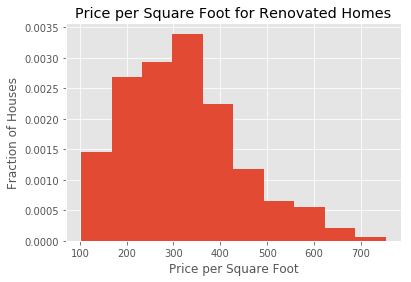

In [62]:
dfren.pricepersqft.hist(density=1)
plt.xlabel('Price per Square Foot')
plt.ylabel('Fraction of Houses')
plt.title('Price per Square Foot for Renovated Homes')
print(dfren.pricepersqft.mean())
print(dfren.pricepersqft.std())

320.1524811502261
125.20040834132786


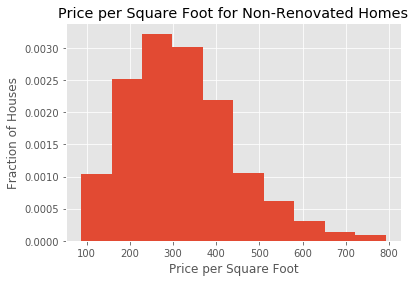

In [63]:
dfnotren.pricepersqft.hist(density= 1)
plt.xlabel('Price per Square Foot')
plt.ylabel('Fraction of Houses')
plt.title('Price per Square Foot for Non-Renovated Homes')
print(dfnotren.pricepersqft.mean())
print(dfnotren.pricepersqft.std())

In [64]:
dfrengrouped = dfren.groupby('yr_renovated_bins', as_index=False).mean()

Text(0.5,1,'Price per Square Foot by Decade of Renovation')

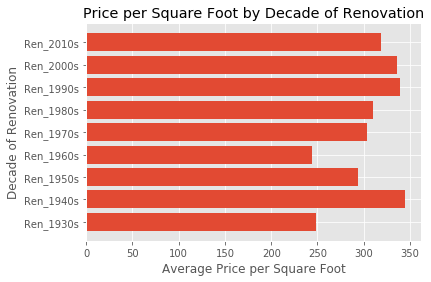

In [65]:
plt.barh(dfrengrouped.yr_renovated_bins, dfrengrouped.pricepersqft)
plt.xlabel('Average Price per Square Foot')
plt.ylabel('Decade of Renovation')
plt.title('Price per Square Foot by Decade of Renovation')

It seems that the difference between the two distributions are minimal, which leads me to believe that in the long term, an old renovated home wont sell for that much higher a price. However, if we compare the renovated hosues to each other, we see that the houses that were renovated most recently have been selling at a higher per square foot value than houses renovated earlier on.

### Question 3: How do waterfront properties compare in terms of price?

In [66]:
water = df[df.waterfront == 1]
nowater = df[df.waterfront == 0]

In [126]:
water['pricepersqftlot'] = water.price/water.sqft_lot
nowater['pricepersqftlot'] = nowater.price/nowater.sqft_lot

485.3930188709049
484.0429422409893
158.50352260260965
260.85412028370615
243.36283185840708
106.10832089884472


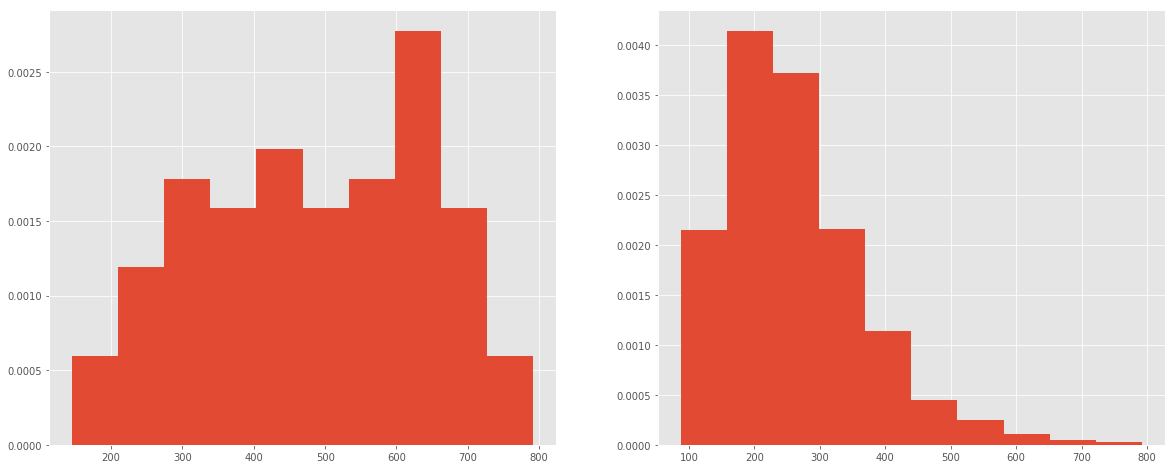

In [118]:
plt.figure(figsize=(20,8))
plt.subplot(121)
water.pricepersqft.hist(density=1)
print(water.pricepersqft.mean())
print(water.pricepersqft.median())
print(water.pricepersqft.std())

plt.subplot(122)
nowater.pricepersqft.hist(density=1)
print(nowater.pricepersqft.mean())
print(nowater.pricepersqft.median())
print(nowater.pricepersqft.std())

102.04238837266091
69.15884335765932
109.24212440154233
90.3933367840413
59.877121732791835
93.30787510585958


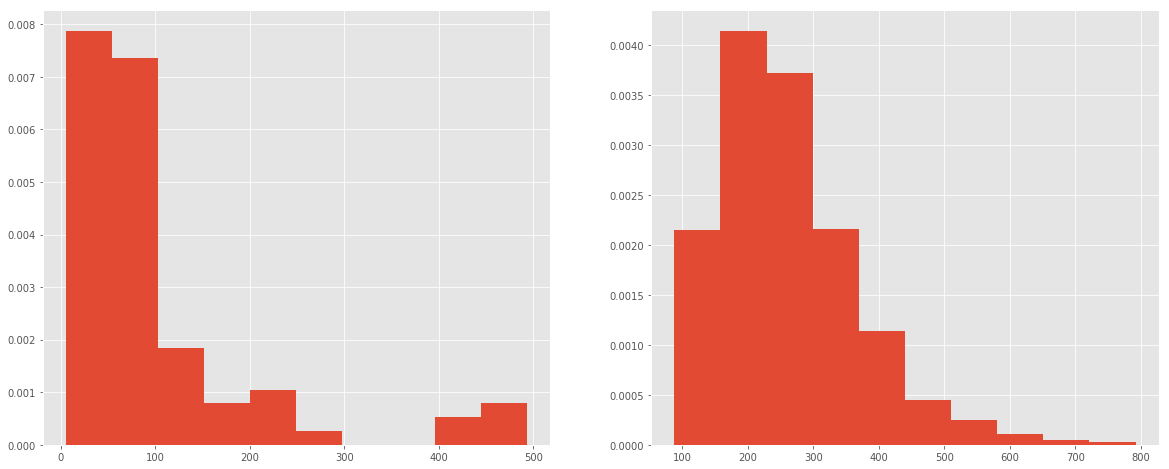

In [127]:
plt.figure(figsize=(20,8))
plt.subplot(121)
water.pricepersqftlot.hist(density=1)
print(water.pricepersqftlot.mean())
print(water.pricepersqftlot.median())
print(water.pricepersqftlot.std())

plt.subplot(122)
nowater.pricepersqft.hist(density=1)
print(nowater.pricepersqftlot.mean())
print(nowater.pricepersqftlot.median())
print(nowater.pricepersqftlot.std())

Text(0.5,1,'Difference in Price per Square Foot for Homes on Water')

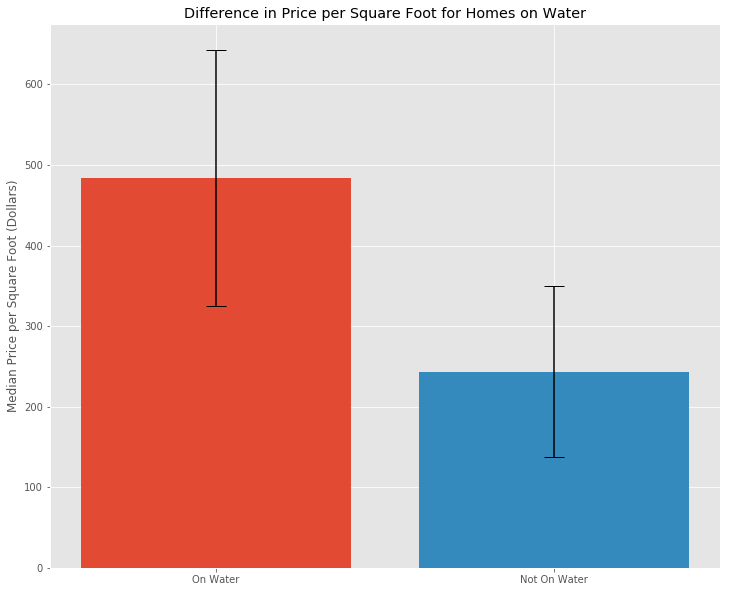

In [122]:
plt.figure(figsize=(12,10))
plt.bar('On Water', 484.04, yerr=158.50, capsize= 10)
plt.bar('Not On Water', 243.363, yerr= 106.108, capsize = 10)
plt.ylabel('Median Price per Square Foot (Dollars)')
plt.title('Difference in Price per Square Foot for Homes on Water')

Homes on the water have a median price per square foot ofliving space nearly twice those not on water. 

1143613.4615384615
1125000.0
591725.3339919309
488110.6466663191
435000.0
248798.52113327055


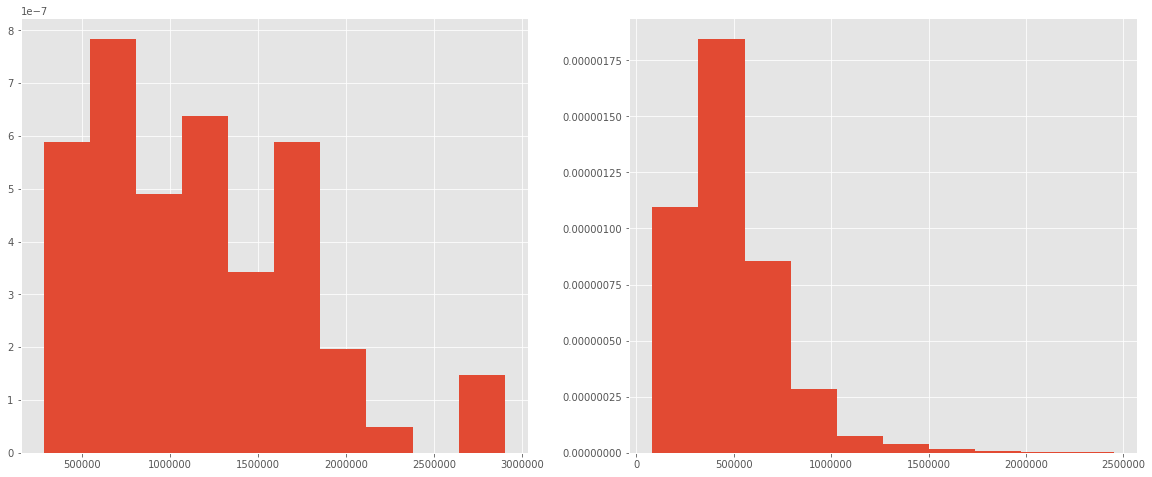

In [123]:
plt.figure(figsize=(20,8))
plt.subplot(121)
water.price.hist(density=1)
print(water.price.mean())
print(water.price.median())
print(water.price.std())

plt.subplot(122)
nowater.price.hist(density=1)
print(nowater.price.mean())
print(nowater.price.median())
print(nowater.price.std())

## M- Model our Data 

Now that we have a sense of what is contained in our data, we can begin to make decisions as to how to model it. For this project, we will be using Multiple Linear Regression to predict the price of a house based on a number of factors.
To do so, we need to:
  - Select which features we will be using for our model
  - Split our train and test data so we can assess our model afterwords
  - Model the data using a linear regression algorythm
  - Assess our model
  - Iterate on our model to improve results

In [68]:
df2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'sqft_living15', 'age', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106'

Because yr_renocated categorical variables are going ot be zeros for most of the data and we are not going to be keeping all of the columns in the model, we will exclude those columns from our model when feature selecting.

In [69]:
X = df2.drop(columns=['price', 'age','yr_renovated_bins_Ren_1930s', 'yr_renovated_bins_Ren_1940s',
       'yr_renovated_bins_Ren_1950s', 'yr_renovated_bins_Ren_1960s',
       'yr_renovated_bins_Ren_1970s', 'yr_renovated_bins_Ren_1980s',
       'yr_renovated_bins_Ren_1990s', 'yr_renovated_bins_Ren_2000s',
       'yr_renovated_bins_Ren_2010s']).astype('float')
y = df2['price']

In [70]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [71]:
selected = stepwise_selection(X, y)

Add  bathrooms                      with p-value 0.0
Add  view                           with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  grade                          with p-value 0.0
Add  zipcode_98004                  with p-value 6.10409e-308
Add  zipcode_98112                  with p-value 3.59677e-223
Add  zipcode_98023                  with p-value 7.68063e-141
Add  condition                      with p-value 1.39874e-131
Add  zipcode_98105                  with p-value 1.90119e-115
Add  zipcode_98040                  with p-value 6.93146e-121
Add  zipcode_98115                  with p-value 5.31601e-119
Add  zipcode_98039                  with p-value 2.52632e-122
Add  zipcode_98103                  with p-value 1.14653e-123
Add  zipcode_98119                  with p-value 4.30063e-132
Add  zipcode_98033                  with p-value 1.95598e-126
Add  zipcode_98117                  with p-value 7.51788e-135
Add  zipcode_98199                  with p-v

We now have our features in order of best features based on their p-values in the resulting model. To make sure we are not overfitting our model, we can use a for loop to loop through different iterations of our model with a varying number of features.

In [72]:
numfeatures = []
rsquareds = []

for amount in range(1,len(selected)+1):
    numfeatures.append(amount)
    newselected = selected[0: amount]
    linreg = LinearRegression()
    linreg.fit(X[newselected], y)
    yhat = linreg.predict(X[newselected])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    rsquareds.append(r_squared)

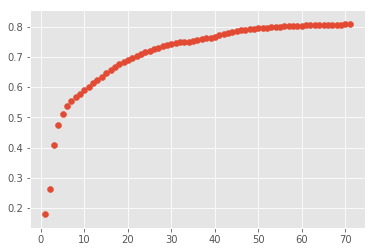

In [73]:
plt.scatter(numfeatures,rsquareds)

Looking at this plot, while more features increases our r_squared value, it seems that at around 25 features, our r_squared value slows down in its increase and we are therefore likely overfitting. We will continue with our model with the first 25 features. 

In [74]:
selectedfeatures = selected[0:25]
linreg = LinearRegression()
linreg.fit(X[selectedfeatures], y)
yhat = linreg.predict(X[selectedfeatures])
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total

In [75]:
r_squared

0.7203857455296274

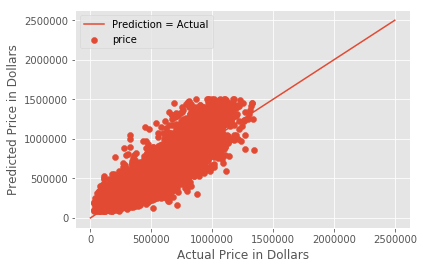

In [161]:
plt.scatter(yhat, y)
plt.plot([1, 2500000], [1,2500000], label= 'Prediction = Actual')
plt.xlabel('Actual Price in Dollars')
plt.ylabel('Predicted Price in Dollars')
plt.legend()

It appears that up until an actual price of around 1,500,000 dollars, our model does a pretty good job. After that, we tend to underestimate the price of the house. We might consider reconstructing our model to contain only data lower than that 1,500,000 dollars price to better predict houses under that price range.

In [77]:
linreg.intercept_

-478107.9820690033

In [78]:
results = pd.DataFrame()
features = X[selectedfeatures]
results['features']= features.columns
results['coef']= linreg.coef_
results

,features,coef
0,bathrooms,-13929.830081
1,view,59752.080808
2,sqft_living,138.837827
3,grade,73022.212215
4,zipcode_98004,508982.060432
5,zipcode_98112,428056.325491
6,zipcode_98023,-153668.770574
7,condition,32867.083027
8,zipcode_98105,320754.206905
9,zipcode_98040,335082.549617


In [79]:
results.sort_values(by=['coef'])

,features,coef
20,zipcode_98092,-153878.699999
6,zipcode_98023,-153668.770574
0,bathrooms,-13929.830081
2,sqft_living,138.837827
7,condition,32867.083027
1,view,59752.080808
3,grade,73022.212215
24,zipcode_98052,114581.388073
23,zipcode_98116,161322.716414
15,zipcode_98117,186430.097441


We perform 10 fold cross validation to assess our model.

In [80]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
cv_10_results = cross_val_score(linreg, features, y, cv=10, scoring="neg_mean_squared_error")
print(cv_10_results)
print(np.mean(cv_10_results))
print(np.sqrt(-np.mean(cv_10_results)))

[-1.78498947e+10 -1.72997573e+10 -1.98501717e+10 -1.62750673e+10
 -1.82278914e+10 -1.90365842e+10 -1.96697844e+10 -1.94801054e+10
 -1.75106245e+10 -1.75680567e+10]
-18276793781.573215
135191.6927239733


### Our model is heavily relying on the zipcode data to determine the price of the houses. However, many of the zipcodes are left out of our model, making it likely that houses in those zipcodes are being undervalued. Let's remove zipcodes as variables and see how our model performs.

In [81]:
X2 = X.drop(columns = ['zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148',
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199'])

In [82]:
selected = stepwise_selection(X2, y)

Add  bathrooms                      with p-value 0.0
Add  view                           with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  grade                          with p-value 0.0
Add  sqft_living                    with p-value 2.21072e-260
Add  condition                      with p-value 1.04273e-136
Add  waterfront                     with p-value 1.19339e-45
Add  sqft_lot                       with p-value 4.15193e-42
Add  sqft_basement                  with p-value 3.35019e-32
Add  bedrooms                       with p-value 2.21007e-23
Add  floors                         with p-value 2.14174e-14


In [83]:
numfeatures = []
rsquareds = []

for amount in range(1,len(selected)+1):
    numfeatures.append(amount)
    newselected = selected[0: amount]
    linreg = LinearRegression()
    linreg.fit(X2[newselected], y)
    yhat = linreg.predict(X2[newselected])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    rsquareds.append(r_squared)

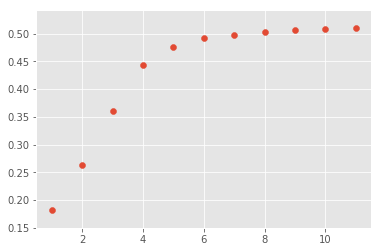

In [84]:
plt.scatter(numfeatures,rsquareds)

Despite the low r_squared values, we will go forward looking at the coefficients of this model as it will be able to give us some information about the relationship between our variables that our model containing zipcodes may lose as zipcodes are likely corelated to several of our features. For example, it is likely that houses in a particilar zipcode have a similar size and therefore our model will downplay the effect of house size if it is already taking into consideration the zipcode.

In [85]:
selectedfeatures = selected[0:4]
linreg = LinearRegression()
linreg.fit(X[selectedfeatures], y)
yhat = linreg.predict(X[selectedfeatures])
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
r_squared

0.44301441373857753

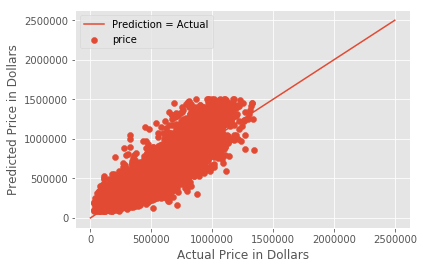

In [162]:
plt.scatter(yhat, y)
plt.plot([1, 2500000], [1,2500000], label= 'Prediction = Actual')
plt.xlabel('Actual Price in Dollars')
plt.ylabel('Predicted Price in Dollars')
plt.legend()

In [87]:
results = pd.DataFrame()
features = X2[selectedfeatures]
results['features']= features.columns
results['coef']= linreg.coef_
results

,features,coef
0,bathrooms,19741.114393
1,view,82170.092916
2,sqft_living15,79.822802
3,grade,107955.030585


In [88]:
cv_10_results = cross_val_score(linreg, features, y, cv=10, scoring="neg_mean_squared_error")
print(cv_10_results)
print(np.mean(cv_10_results))
print(np.sqrt(-np.mean(cv_10_results)))

[-3.34341191e+10 -3.61753143e+10 -3.73703407e+10 -3.42037984e+10
 -3.57687682e+10 -3.91054818e+10 -3.87922923e+10 -3.77708095e+10
 -3.46151998e+10 -3.45817120e+10]
-36181783608.19952
190215.09826562012


Without our zipcode data, our model does not hit an rsquared of .5 without tapering off. Because this value is so low, it will surely not be able to do nearly as well as our previous model. However, we can still think about increasing the usefulness of our previous model by looking only at houses below the 1,500,000 dollar price. While we will be losing additional data points, many of those are major outliers that skew the data and our model.

In [89]:
df2 = df2[df2.price <= 1500000]

In [90]:
X = df2.drop(columns=['price', 'age','yr_renovated_bins_Ren_1930s', 'yr_renovated_bins_Ren_1940s',
       'yr_renovated_bins_Ren_1950s', 'yr_renovated_bins_Ren_1960s',
       'yr_renovated_bins_Ren_1970s', 'yr_renovated_bins_Ren_1980s',
       'yr_renovated_bins_Ren_1990s', 'yr_renovated_bins_Ren_2000s',
       'yr_renovated_bins_Ren_2010s']).astype('float')
y = df2['price']

In [91]:
selected = stepwise_selection(X, y)

Add  bathrooms                      with p-value 0.0
Add  view                           with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  grade                          with p-value 0.0
Add  zipcode_98004                  with p-value 7.22877e-268
Add  zipcode_98112                  with p-value 4.51523e-163
Add  zipcode_98023                  with p-value 4.11131e-163
Add  zipcode_98040                  with p-value 1.02169e-152
Add  zipcode_98115                  with p-value 1.3959e-133
Add  zipcode_98105                  with p-value 1.29129e-138
Add  zipcode_98103                  with p-value 2.65555e-145
Add  zipcode_98117                  with p-value 4.17282e-142
Add  zipcode_98033                  with p-value 8.28795e-147
Add  zipcode_98119                  with p-value 5.99191e-151
Add  zipcode_98199                  with p-value 1.18812e-160
Add  zipcode_98042                  with p-value 9.61632e-105
Add  zipcode_98092                  with p-va

In [92]:
numfeatures = []
rsquareds = []

for amount in range(1,len(selected)+1):
    numfeatures.append(amount)
    newselected = selected[0: amount]
    linreg = LinearRegression()
    linreg.fit(X[newselected], y)
    yhat = linreg.predict(X[newselected])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    rsquareds.append(r_squared)

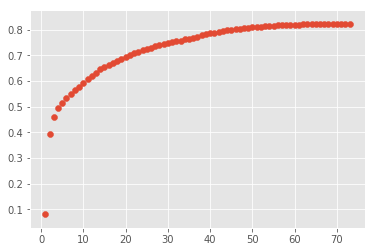

In [93]:
plt.scatter(numfeatures,rsquareds)

Again, it looks as though around 25 features is where the dropoff is in how much we are gaining per feature. We will use that as the number of features we will be using.

In [94]:
selectedfeatures = selected[0:25]
linreg = LinearRegression()
linreg.fit(X[selectedfeatures], y)
yhat = linreg.predict(X[selectedfeatures])
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total

In [95]:
r_squared

0.726262251065871

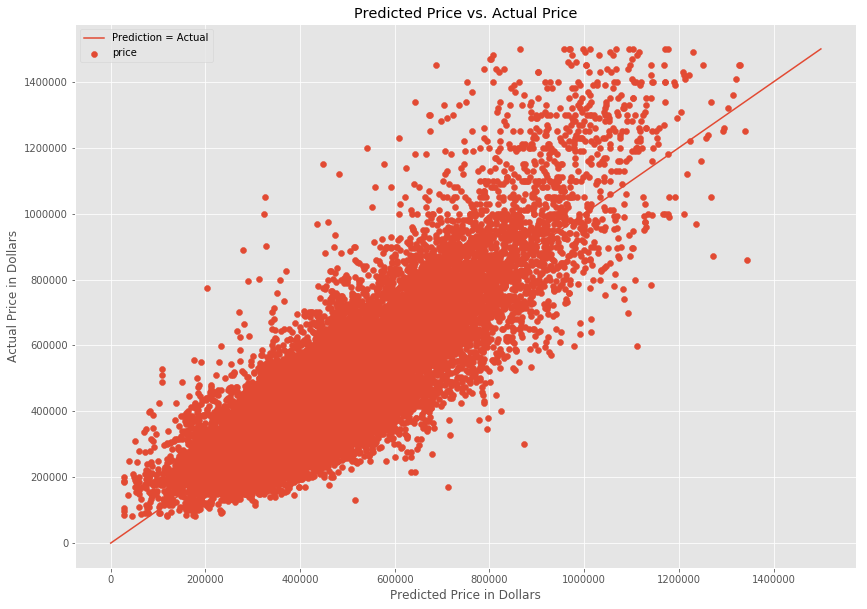

In [165]:
plt.figure(figsize=(14,10))
plt.scatter(yhat, y)
plt.plot([1, 1500000], [1,1500000], label= 'Prediction = Actual')
plt.xlabel('Predicted Price in Dollars')
plt.ylabel('Actual Price in Dollars')
plt.title('Predicted Price vs. Actual Price')
plt.legend()

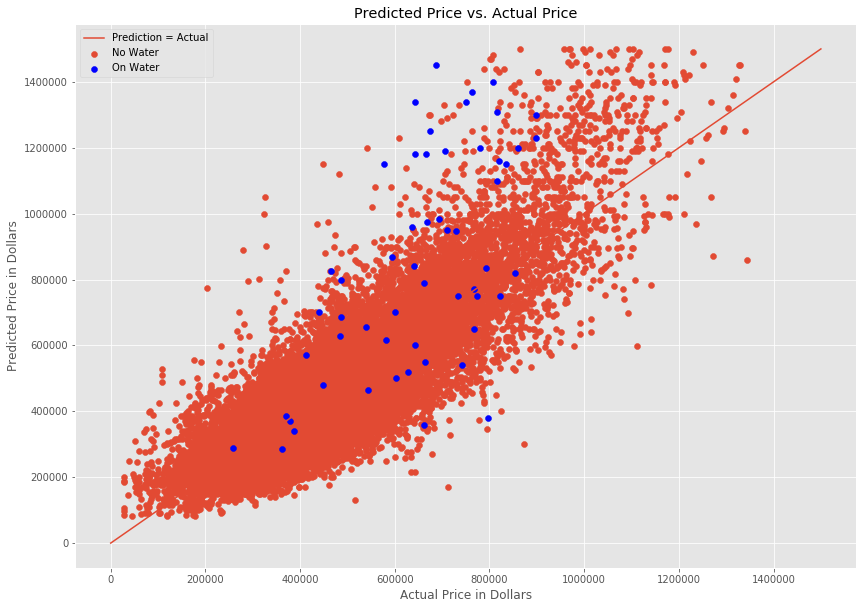

In [164]:
Xy = X
Xy['y'] = y
Xy['yhat'] = yhat
waterfinal = Xy[Xy['waterfront']==1]
notwaterfinal = Xy[Xy['waterfront']==0]

plt.figure(figsize=(14,10))

plt.scatter(notwaterfinal.yhat, notwaterfinal.y, label='No Water')
plt.scatter(waterfinal.yhat, waterfinal.y, c='blue', label='On Water')
plt.plot([1, 1500000], [1,1500000], label= 'Prediction = Actual')
plt.xlabel('Actual Price in Dollars')
plt.ylabel('Predicted Price in Dollars')
plt.title('Predicted Price vs. Actual Price')
plt.legend()

In [97]:
results = pd.DataFrame()
features = X[selectedfeatures]
results['features']= features.columns
results['coef']= linreg.coef_
results

,features,coef
0,view,56290.115714
1,sqft_living,121.829471
2,grade,64191.320536
3,zipcode_98004,467327.330322
4,zipcode_98112,367707.604757
5,zipcode_98023,-146070.063062
6,zipcode_98040,346535.521160
7,zipcode_98115,205092.164889
8,zipcode_98105,307343.020270
9,zipcode_98103,197810.168653


In [98]:
linreg.intercept_

-392543.3563507324

In [102]:
residuals = y - yhat
residualssquared = residuals**2
sumsquared = sum(residualssquared)
MSE = sumsquared/len(residuals)
RMSE = np.sqrt(MSE)
RMSE

119325.20500716937

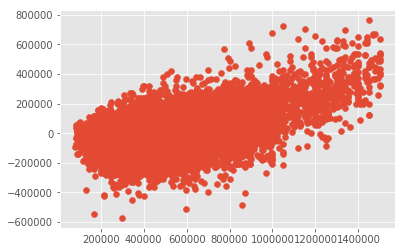

In [153]:
Xy['residuals']= residuals
plt.scatter(Xy.y, Xy.residuals)

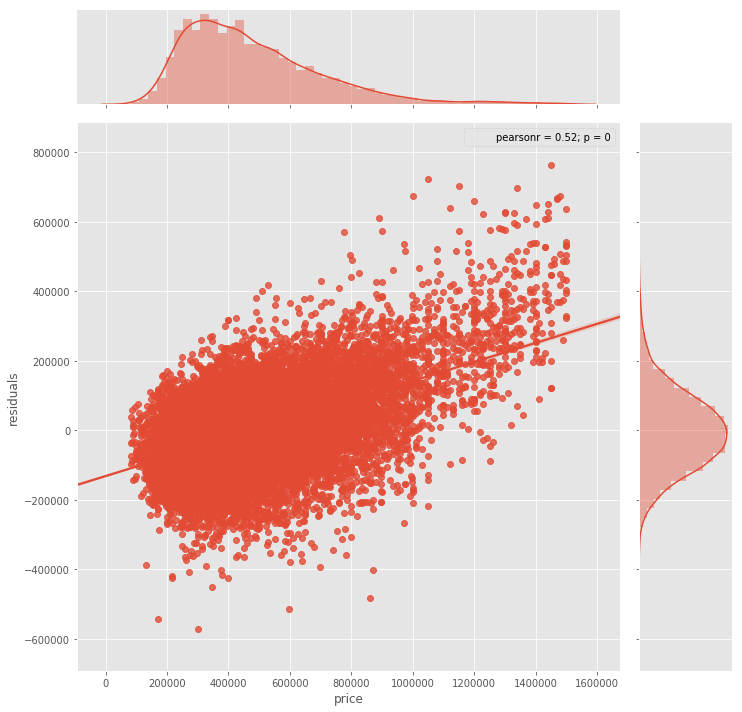

In [160]:
sns.jointplot(x=y, y='residuals', data=Xy, kind='reg', size=10)


As we see here, we tend to overpredict high values and underpredict low values. This is a limitation to our model and something that would be addressed with more time. It is likely due to  factors being too coorelated, for example larger houses existing in certain zipcodes. This would introduce the effect of house size more than once in our model.

In [104]:
cv_10_results = cross_val_score(linreg, features, y, cv=5, scoring="neg_mean_squared_error")
print(cv_10_results)
print(np.mean(cv_10_results))
print(np.sqrt(-np.mean(cv_10_results)))

[-1.41223391e+10 -1.46217247e+10 -1.46809274e+10 -1.36393057e+10
 -1.47238035e+10]
-14357620086.773197
119823.28691357619


## N - iNterpret the results

Our model uses 25 features, whether the home is in one of 21 zipcodes and 4 additional peices of information, to predict how much a given house sold for. Our model starts by assuming the house costs -392543.36 Dollars and adds amd subtracts value based on those given criteria. For example, for every point a house recieved in it's grade, our model adds 64191.32 Dollars to the house's value. For every square foot in living area of the house, our model adds 121.83 Dollars to the value. If the house is in the 98039 zipcode, the model adds 658612.50 Dollars to the house's predicted value.

The model has an r squared value of .726, meaning 72.6 percent of the variation in our data can be explained using our model. We also have a root mean squared error of 119793.07 Dollars. It is important to note that the root mean squared error penalizes larger errors more than it does smaller errors, and therefore it is not the pure mean error for a given prediction.